## Задание:
1. Выберите набор данных (датасет) для решения задачи классификации или регресии.
2. В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
3. С использованием метода train_test_split разделите выборку на обучающую и тестовую.
4. Обучите две ансамблевые модели. Оцените качество моделей с помощью одной из подходящих для задачи метрик. Сравните качество полученных моделей.
5. Произведите для каждой модели подбор значений одного гиперпараметра. В зависимости от используемой библиотеки можно применять функцию GridSearchCV, использовать перебор параметров в цикле, или использовать другие методы.
6. Повторите пункт 4 для найденных оптимальных значений гиперпараметров. Сравните качество полученных моделей с качеством моделей, полученных в пункте 4

In [2]:
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from scipy import stats
from IPython.display import Image
from sklearn.externals.six import StringIO 
from IPython.display import Image
import graphviz 
import pydotplus
from sklearn.datasets import load_iris, load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
!pip install heamy
from heamy.estimator import Regressor, Classifier
from heamy.pipeline import ModelsPipeline
from heamy.dataset import Dataset
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")



/home/lisobol/tensorflow_env/my_tensorflow/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


### 1. Выбор набора данных для решения задачи регресии.

In [3]:
data = pd.read_csv('data/vgsales.csv', sep=',')
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
data.shape 

(16598, 11)

In [5]:
data.isnull().sum() 

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [6]:
data.dtypes 

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

### 2. Удаление и заполнение пропусков и кодирование категориальных признаков.

In [7]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета набора 1
num_cols = []
total_count = data.shape[0]
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Year. Тип данных float64. Количество пустых значений 271, 1.63%.


In [8]:
# Фильтр по колонкам с пропущенными значениями  набора 1
data_num = data[num_cols].mean()
data_num

Year    2006.406443
dtype: float64

In [9]:
data[num_cols] = data[num_cols].fillna(data[num_cols].mean())

In [10]:
data.isnull().sum() 

Rank             0
Name             0
Platform         0
Year             0
Genre            0
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

In [11]:
data = data.fillna('')
data.isnull().sum() 

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [12]:
data.dtypes 


Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

#### Кодирование категориальных признаков числовыми

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Name'] = le.fit_transform(data['Name'])
data['Platform'] = le.fit_transform(data['Platform'])
data['Genre'] = le.fit_transform(data['Genre'])
data['Publisher'] = le.fit_transform(data['Publisher'])
data.dtypes

Rank              int64
Name              int64
Platform          int64
Year            float64
Genre             int64
Publisher         int64
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [14]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,11007,26,2006.0,10,360,41.49,29.02,3.77,8.46,82.74
1,2,9327,11,1985.0,4,360,29.08,3.58,6.81,0.77,40.24
2,3,5573,26,2008.0,6,360,15.85,12.88,3.79,3.31,35.82
3,4,11009,26,2009.0,10,360,15.75,11.01,3.28,2.96,33.00
4,5,7346,5,1996.0,7,360,11.27,8.89,10.22,1.00,31.37


In [17]:
# # # Масштабирование данных в диапазоне от 0 до 1
# sc1 = MinMaxScaler()
# sc1_data = sc1.fit_transform(data)
# X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(
#     sc1_data, data['Global_Sales'], test_size=0.26, random_state=1)

# X_train_1.shape, X_test_1.shape

In [18]:
columns = ['Platform', 'Name', 'Year', 'Genre', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']


In [19]:
x_array = data[columns].values
y_array = data['Rank'].values 

### 3. Разделение с использованием метода train_test_split  выборки на обучающую и тестовую.


In [20]:
X_train, X_test, y_train, y_test = train_test_split(x_array, y_array,
test_size=0.26, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12282, 9), (4316, 9), (12282,), (4316,))

### 4. Обучение двух ансамблевых моделей. Оценка качества моделей с помощью одной из подходящих для задачи метрик. Сравнение качества полученных моделей.
#### 4.1. Стекинг 

In [21]:
# Качество отдельных моделей
def val_mae(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    result = mean_absolute_error(y_test, y_pred)
    print(model)
    print('MAE={}'.format(result))

In [22]:
# Точность на отдельных моделях
for model in [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(n_estimators=50)
]:
    val_mae(model)
    print('==========================')
    print()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
MAE=3590.6105058314756

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
MAE=100.15685820203892

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=None, verb

In [23]:
# набор данных
dataset = Dataset(X_train, y_train, X_test)

# модели первого уровня
model_tree = Regressor(dataset=dataset, estimator=DecisionTreeRegressor, name='tree')
model_lr = Regressor(dataset=dataset, estimator=LinearRegression, parameters={'normalize': True},name='lr')
model_rf = Regressor(dataset=dataset, estimator=RandomForestRegressor, parameters={'n_estimators': 50},name='rf')


In [24]:
# Эксперимент 1.1
# Первый уровень - две модели: дерево и линейная регрессия
# Второй уровень: линейная регрессия

pipeline = ModelsPipeline(model_tree, model_lr)
stack_ds = pipeline.stack(k=10, seed=1)
# модель второго уровня
stacker = Regressor(dataset=stack_ds, estimator=LinearRegression)
results = stacker.validate(k=10,scorer=mean_absolute_error)


Metric: mean_absolute_error
Folds accuracy: [101.05504753807202, 98.68054521451998, 93.1887663479923, 102.46379170308225, 95.66529052863154, 99.32336541685724, 111.63309812884769, 101.54275570943696, 103.21560469209982, 101.55689083889365]
Mean accuracy: 100.83251561184333
Standard Deviation: 4.670193439805995
Variance: 21.81070676520696


In [25]:
# Эксперимент 1.2
# Первый уровень - две модели: дерево и линейная регрессия
# Второй уровень: случайный лес

stacker = Regressor(dataset=stack_ds, estimator=RandomForestRegressor)
results = stacker.validate(k=10,scorer=mean_absolute_error)


Metric: mean_absolute_error
Folds accuracy: [87.6426932465419, 81.69672904800653, 81.91263029315961, 88.48411237785018, 85.58969869706837, 85.8906107491857, 94.31790716612376, 84.81938110749184, 87.3342589576547, 85.8931026058632]
Mean accuracy: 86.35811242489459
Standard Deviation: 3.396541919452603
Variance: 11.536497010598772


In [26]:
# Эксперимент 1.3
# Первый уровень - две модели: дерево и линейная регрессия
# Второй уровень: дерево

stacker = Regressor(dataset=stack_ds, estimator=DecisionTreeRegressor)
results = stacker.validate(k=10,scorer=mean_absolute_error)

Metric: mean_absolute_error
Folds accuracy: [107.14890154597234, 101.77542717656631, 103.0456026058632, 110.8013029315961, 107.71335504885994, 111.40390879478828, 117.74837133550488, 108.68241042345277, 110.51221498371335, 105.79315960912052]
Mean accuracy: 108.46246544554376
Standard Deviation: 4.336713512678101
Variance: 18.807084091044835


In [27]:
# Эксперимент 2.1
# Первый уровень - две модели: дерево и случайный лес
# Второй уровень: линейная регрессия 
pipeline = ModelsPipeline(model_tree, model_rf)
stack_ds = pipeline.stack(k=10, seed=1)
# модель второго уровня
stacker = Regressor(dataset=stack_ds, estimator=LinearRegression)
results = stacker.validate(k=10,scorer=mean_absolute_error)

Metric: mean_absolute_error
Folds accuracy: [83.0022864466405, 76.7675123177237, 76.52583751372313, 81.3568944730721, 77.25352865690145, 75.62140435834345, 85.58333023773896, 79.79816510376472, 79.93518440199674, 81.48086791062704]
Mean accuracy: 79.73250114205317
Standard Deviation: 3.0460597672547554
Variance: 9.278480105688095


In [28]:

# Эксперимент 2.2
# Первый уровень - две модели: дерево и случайный лес
# Второй уровень: случайный лес

stacker = Regressor(dataset=stack_ds, estimator=RandomForestRegressor)
results = stacker.validate(k=10,scorer=mean_absolute_error)

Metric: mean_absolute_error
Folds accuracy: [85.92564895966525, 80.87215215622456, 84.50739033659065, 86.36403528773073, 83.96345063595473, 83.48672960291609, 89.7915006786102, 84.55184039087948, 83.88554440049637, 84.70701954397394]
Mean accuracy: 84.80553119930421
Standard Deviation: 2.178821372167754
Variance: 4.747262571814974


In [29]:
# Эксперимент 2.3
# Первый уровень - две модели: дерево и случайный лес
# Второй уровень: дерево

stacker = Regressor(dataset=stack_ds, estimator=DecisionTreeRegressor)
results = stacker.validate(k=10,scorer=mean_absolute_error)

Metric: mean_absolute_error
Folds accuracy: [107.13181448331977, 105.25223759153783, 107.13599348534201, 103.8086319218241, 104.60342019543974, 104.4584690553746, 110.20195439739413, 101.99837133550488, 106.76547231270358, 105.50977198697069]
Mean accuracy: 105.68661367654113
Standard Deviation: 2.139464767551578
Variance: 4.577309491594527


In [30]:
# Эксперимент 3.1
# Первый уровень - две модели: линейная регрессия и случайный лес
# Второй уровень: линейная регрессия
pipeline = ModelsPipeline(model_lr, model_rf)
stack_ds = pipeline.stack(k=10, seed=1)
# модель второго уровня
stacker = Regressor(dataset=stack_ds, estimator=LinearRegression)
results = stacker.validate(k=10,scorer=mean_absolute_error)

Metric: mean_absolute_error
Folds accuracy: [83.05833714764005, 76.91059773107504, 76.45827357045583, 81.20574852665894, 76.98074637046285, 75.72574074135834, 85.97681235234108, 80.00097973450144, 80.0461110392515, 81.42068229739571]
Mean accuracy: 79.77840295111409
Standard Deviation: 3.1230173156901393
Variance: 9.753237154100443


In [31]:
# Эксперимент 3.2
# Первый уровень - две модели:  линейная регрессия и случайный лес
# Второй уровень: случайный лес

stacker = Regressor(dataset=stack_ds, estimator=RandomForestRegressor)
results = stacker.validate(k=10,scorer=mean_absolute_error)

Metric: mean_absolute_error
Folds accuracy: [86.46650935720096, 78.63644426362897, 78.79664495114008, 86.08108306188926, 83.66583061889249, 80.70199511400651, 89.07232084690554, 83.42728827361563, 85.71984527687296, 84.21021172638436]
Mean accuracy: 83.67781734905368
Standard Deviation: 3.244475181915836
Variance: 10.526619206067798


In [32]:
# Эксперимент 3.3
# Первый уровень - две модели: линейная регрессия и случайный лес
# Второй уровень: дерево

stacker = Regressor(dataset=stack_ds, estimator=DecisionTreeRegressor)
results = stacker.validate(k=10,scorer=mean_absolute_error)

Metric: mean_absolute_error
Folds accuracy: [111.66476810414972, 101.45077298616762, 101.5586319218241, 114.38680781758957, 105.69381107491857, 100.71661237785017, 111.40390879478828, 105.12052117263843, 107.70928338762215, 103.71254071661238]
Mean accuracy: 106.3417658354161
Standard Deviation: 4.558717915992085
Variance: 20.78190903758722


In [33]:
# Эксперимент 4
# Первый уровень - три модели: дерево, линейная регрессия и случайный лес
# Второй уровень: линейная регрессия
pipeline = ModelsPipeline(model_tree, model_lr, model_rf)
stack_ds3 = pipeline.stack(k=10, seed=1)
# модель второго уровня
stacker = Regressor(dataset=stack_ds3, estimator=LinearRegression)
results = stacker.validate(k=10,scorer=mean_absolute_error)

Metric: mean_absolute_error
Folds accuracy: [83.23089002236054, 76.79583934161822, 76.80909023867751, 81.36725394695083, 77.34639456636724, 75.71020843187246, 85.71494858932246, 79.8257966603079, 80.06647360443235, 81.58660594924592]
Mean accuracy: 79.84535013511554
Standard Deviation: 3.0524428474647856
Variance: 9.31740733703893


In [34]:
# Эксперимент 5
# Первый уровень - три модели: дерево, линейная регрессия и случайный лес
# Второй уровень: дерево
stacker = Regressor(dataset=stack_ds3, estimator=RandomForestRegressor)
results = stacker.validate(k=10,scorer=mean_absolute_error)

Metric: mean_absolute_error
Folds accuracy: [84.5293327908869, 78.46600488201788, 78.34673452768729, 83.81155537459284, 81.58912866449512, 80.83397394136806, 88.85859934853421, 82.0663680781759, 82.1598697068404, 81.7132328990228]
Mean accuracy: 82.23748002136213
Standard Deviation: 2.891915890971849
Variance: 8.363177520455505


In [35]:
# Эксперимент 6
# Первый уровень - три модели: дерево, линейная регрессия и случайный лес
# Второй уровень: случайный лес
stacker = Regressor(dataset=stack_ds3, estimator=DecisionTreeRegressor)
results = stacker.validate(k=10,scorer=mean_absolute_error)

Metric: mean_absolute_error
Folds accuracy: [106.40683482506103, 103.02196908055329, 101.72394136807817, 109.36482084690553, 103.3485342019544, 105.22231270358306, 110.25895765472313, 104.52524429967427, 104.35830618892508, 106.435667752443]
Mean accuracy: 105.4666588921901
Standard Deviation: 2.5812789497473854
Variance: 6.663001016408964


Поскольку у линейной регрессии слишком большая ошибка - 3590.6105058314756, уберем ее с графика

In [37]:
# Результаты
array_labels = ['TREE', 'RF', 
                'TREE+LR=>LR',  'TREE+LR=>RF','TREE+LR=>TREE',
                 'TREE+RF=>LR', 'TREE+RF=>RF','TREE+RF=>TREE',
                'LR+RF=>LR', 'LR+RF=>RF','LR+RF=>TREE',
               
                'TREE+LR+RF=>LR', 'TREE+LR+RF=>RF', 'TREE+LR+RF=>TREE']
array_mae = [100.39202965708989, 80.2804124189064,
             
             100.83251561184333,  86.35811242489459, 108.46246544554376,
            79.73250114205317, 84.80553119930421, 105.68661367654113,
            79.77840295111409, 83.67781734905368, 106.3417658354161,
            
             79.84535013511554, 82.23748002136213, 105.4666588921901
            ]

In [38]:
def vis_models_quality(array_metric, array_labels, str_header, figsize=(5, 5)):
    fig, ax1 = plt.subplots(figsize=figsize)
    pos = np.arange(len(array_metric))
    rects = ax1.barh(pos, array_metric,
                     align='center',
                     height=0.5, 
                     tick_label=array_labels)
    ax1.set_title(str_header)
    for a,b in zip(pos, array_metric):
        plt.text(0.2, a-0.1, str(round(b,3)), color='white')
    plt.show()

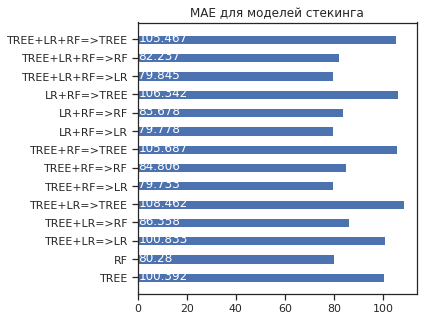

In [39]:
# Визуализация результатов
vis_models_quality(array_mae, array_labels, 'MAE для моделей стекинга')


Выведем лучшие модели

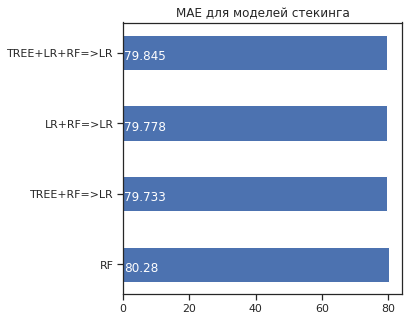

In [40]:
# Результаты
array_labels = [ 'RF', 
                'TREE+RF=>LR', 
                'LR+RF=>LR', 
                'TREE+LR+RF=>LR' ]
array_mae = [ 80.2804124189064,
          
            79.73250114205317, 
            79.77840295111409, 
            
             79.84535013511554]

# Визуализация результатов
vis_models_quality(array_mae, array_labels, 'MAE для моделей стекинга')


Видим, что лучшие результаты стекинга сравнимы с наиболее сильной моделью 1 уровня (случайным лесом) и самые сильные модели получились, если на втором уровне использовалась линейная регрессия, а на первом одна из моделей - случайный лес.

#### 4.2. Метод группового учета аргументов

In [41]:
# !pip install gmdhpy
from gmdhpy import gmdh

In [ ]:
model = gmdh.MultilayerGMDH()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
result = mean_absolute_error(y_test, y_pred)
# print(model)
print('MAE={}'.format(result))

In [ ]:
model = gmdh.MultilayerGMDH(ref_functions=('linear_cov', 'quadratic', 'cubic', 'linear'))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
result = mean_absolute_error(y_test, y_pred)
# print(model)
print('MAE={}'.format(result))

Видим, что для данной задачи этот метод выдает слишком большую ошибку? необходима настройка параметров.

### 5. Подбор значений одного гиперпараметра для моделей. 
#### 5.1. Стекинг 

In [329]:
# # Возьмем лучшую модель: 'TREE+RF=>LR'

# # Эксперимент 2.1
# # Первый уровень - две модели: дерево и случайный лес
# # Второй уровень: линейная регрессия 
# pipeline = ModelsPipeline(model_tree, model_rf)
# stack_ds = pipeline.stack(k=10, seed=1)
# # модель второго уровня
# stacker = Regressor(dataset=stack_ds, estimator=LinearRegression)
# results = stacker.validate(k=10,scorer=mean_absolute_error)

In [464]:
DecisionTreeRegressor().get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [495]:
params = {
'min_impurity_split': [ 0, 0.5,1,1.5,2, 3]
}

In [496]:
%%time
grid_1 = GridSearchCV(estimator=DecisionTreeRegressor(),
                    param_grid=params, scoring='neg_mean_absolute_error', cv=3, n_jobs=-1)
grid_1.fit(data, y_array)
grid_1.estimator.get_params().keys()


CPU times: user 216 ms, sys: 10.5 ms, total: 227 ms
Wall time: 897 ms


/home/lisobol/tensorflow_env/my_tensorflow/lib/python3.7/site-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


dict_keys(['ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [497]:
grid_1.best_params_

{'min_impurity_split': 1.5}

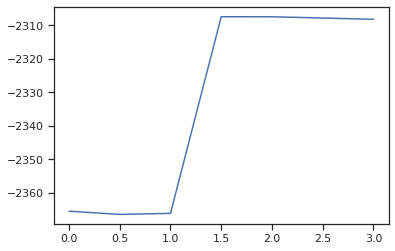

In [498]:
plt.plot(params['min_impurity_split'], grid_1.cv_results_["mean_test_score"]);

#### 5.2 Метод  группового учета аргументов

In [52]:
model = gmdh.MultilayerGMDH(ref_functions=('linear_cov', 'quadratic', 
                                               'cubic', 'linear'),
                               n_jobs=2
                               )
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
result = mean_absolute_error(y_test, y_pred)
print('MAE={}'.format(result))

train layer0 in 10.48 sec
train layer1 in 47.28 sec
train layer2 in 45.52 sec
train layer3 in 45.87 sec
train layer4 in 41.48 sec
train layer5 in 44.12 sec
train layer6 in 43.02 sec
train layer7 in 43.37 sec
train layer8 in 46.28 sec
train layer9 in 47.69 sec
train layer10 in 48.73 sec
train layer11 in 47.99 sec
train layer12 in 48.15 sec
train layer13 in 47.65 sec
train layer14 in 48.25 sec
train layer15 in 45.44 sec
train layer16 in 43.79 sec
train layer17 in 43.45 sec
train layer18 in 44.61 sec
train layer19 in 43.84 sec
train layer20 in 43.67 sec
train layer21 in 43.18 sec
train layer22 in 47.02 sec
train layer23 in 44.35 sec
train layer24 in 44.22 sec
train layer25 in 44.63 sec
MAE=6421340804610.882


Process ForkPoolWorker-5:
Process ForkPoolWorker-6:
Traceback (most recent call last):
  File "/home/lisobol/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/lisobol/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/lisobol/anaconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/home/lisobol/anaconda3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/home/lisobol/anaconda3/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
Traceback (most recent call last):
KeyboardInterrupt
  File "/home/lisobol/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/lisobol/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs

In [54]:
model = gmdh.MultilayerGMDH(ref_functions=('linear_cov', 'quadratic', 
                                               'cubic', 'linear'),
                               criterion_minimum_width=5
                               )
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
result = mean_absolute_error(y_test, y_pred)
print('MAE={}'.format(result))

train layer0 in 15.88 sec
train layer1 in 66.05 sec
train layer2 in 66.15 sec
train layer3 in 66.66 sec
train layer4 in 67.51 sec
train layer5 in 68.54 sec
train layer6 in 68.09 sec
train layer7 in 68.20 sec
train layer8 in 67.01 sec
train layer9 in 67.80 sec
train layer10 in 68.10 sec
train layer11 in 68.16 sec
train layer12 in 67.78 sec
train layer13 in 67.45 sec
train layer14 in 67.30 sec
train layer15 in 67.75 sec
train layer16 in 67.57 sec
train layer17 in 67.55 sec
train layer18 in 67.47 sec
train layer19 in 66.66 sec
train layer20 in 67.82 sec
train layer21 in 68.18 sec
train layer22 in 67.93 sec
train layer23 in 67.72 sec
train layer24 in 67.99 sec
train layer25 in 67.93 sec
MAE=6421340804610.882


In [60]:
model = gmdh.MultilayerGMDH(ref_functions=('linear_cov'),
                           max_layer_count=4)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
result = mean_absolute_error(y_test, y_pred)
print('MAE={}'.format(result))

train layer0 in 3.02 sec
train layer1 in 13.88 sec
train layer2 in 13.54 sec
train layer3 in 15.58 sec
MAE=2856.70534740398


In [61]:
model = gmdh.MultilayerGMDH(ref_functions=('quadratic'),
                           max_layer_count=4)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
result = mean_absolute_error(y_test, y_pred)
print('MAE={}'.format(result))

train layer0 in 4.37 sec
train layer1 in 18.78 sec
train layer2 in 18.41 sec
train layer3 in 18.92 sec
MAE=3182.225760225751


In [62]:
model = gmdh.MultilayerGMDH(ref_functions=('cubic'),
                           max_layer_count=4)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
result = mean_absolute_error(y_test, y_pred)
print('MAE={}'.format(result))

train layer0 in 6.14 sec
train layer1 in 24.60 sec
train layer2 in 24.20 sec
train layer3 in 24.45 sec
MAE=3654496.822551804


In [66]:
model = gmdh.MultilayerGMDH(ref_functions=('linear_cov', 'quadratic', 
                                               'cubic', 'linear'),                           
                            max_layer_count=4)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
result = mean_absolute_error(y_test, y_pred)
print('MAE={}'.format(result))

train layer0 in 16.77 sec
train layer1 in 72.14 sec
train layer2 in 75.26 sec
train layer3 in 73.36 sec
MAE=170223.6536631281


In [78]:
params = {
    'ref_functions': ['linear_cov', 'quadratic', 'cubic', 'linear']
    
}

In [80]:
for param in params['ref_functions']:
    model = gmdh.MultilayerGMDH(ref_functions=(param),                           
                            max_layer_count=3)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    result = mean_absolute_error(y_test, y_pred)
    print('Param value: {}, MAE={}'.format(param, result))
    print()

train layer0 in 3.18 sec
train layer1 in 14.76 sec
train layer2 in 16.33 sec
Param value: linear_cov, MAE=2887.5624539528417

train layer0 in 4.82 sec
train layer1 in 18.74 sec
train layer2 in 18.27 sec
Param value: quadratic, MAE=3182.225760225751

train layer0 in 5.91 sec
train layer1 in 24.71 sec
train layer2 in 25.34 sec
Param value: cubic, MAE=3654496.822551804

train layer0 in 3.04 sec
train layer1 in 13.61 sec
train layer2 in 12.34 sec
Param value: linear, MAE=3733.7389473277804



Видим, что функция linear_cov лучше всех снизила ошибку.

In [73]:
params = {
    'max_layer_count': [1,2,3,4,6,8, 10],
    
}

In [75]:
for param in params['max_layer_count']:
    model = gmdh.MultilayerGMDH(ref_functions=('linear_cov'),                           
                            max_layer_count=param)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    result = mean_absolute_error(y_test, y_pred)
    print('Param value: {}, MAE={}'.format(param, result))
    print()

train layer0 in 3.51 sec
Param value: 1, MAE=3446.9622156171276

train layer0 in 3.42 sec
train layer1 in 14.41 sec
Param value: 2, MAE=3021.9403458283196

train layer0 in 3.45 sec
train layer1 in 14.27 sec
train layer2 in 14.39 sec
Param value: 3, MAE=2887.5624539528417

train layer0 in 3.21 sec
train layer1 in 14.24 sec
train layer2 in 15.76 sec
train layer3 in 15.32 sec
Param value: 4, MAE=2856.70534740398

train layer0 in 3.30 sec
train layer1 in 16.20 sec
train layer2 in 14.49 sec
train layer3 in 14.54 sec
train layer4 in 15.00 sec
train layer5 in 15.43 sec
Param value: 6, MAE=2720.0356332397296

train layer0 in 3.27 sec
train layer1 in 14.47 sec
train layer2 in 13.71 sec
train layer3 in 15.91 sec
train layer4 in 14.78 sec
train layer5 in 14.61 sec
train layer6 in 14.66 sec
train layer7 in 14.52 sec
Param value: 8, MAE=3573.4037932916804

train layer0 in 3.47 sec
train layer1 in 15.28 sec
train layer2 in 15.36 sec
train layer3 in 14.79 sec
train layer4 in 14.10 sec
train layer5 in

### 6. Повтор пункта 4 для найденных оптимальных значений гиперпараметров. Сравнение качества полученных моделей с качеством моделей, полученных в пункте 4

In [494]:
# Возьмем лучшую модель: 'TREE+RF=>LR'
# модели первого уровня
model_tree = Regressor(dataset=dataset, estimator=DecisionTreeRegressor, parameters={'min_impurity_split':1.5},name='tree')
model_lr = Regressor(dataset=dataset, estimator=LinearRegression, parameters={'normalize': True},name='lr')
model_rf = Regressor(dataset=dataset, estimator=RandomForestRegressor, parameters={'n_estimators': 50},name='rf')

# Эксперимент 2.1
# Первый уровень - две модели: дерево и случайный лес
# Второй уровень: линейная регрессия 
pipeline = ModelsPipeline(model_tree, model_rf)
stack_ds = pipeline.stack(k=10, seed=1)
# модель второго уровня
stacker = Regressor(dataset=stack_ds, estimator=LinearRegression)
results = stacker.validate(k=10,scorer=mean_absolute_error)

/home/lisobol/tensorflow_env/my_tensorflow/lib/python3.7/site-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
/home/lisobol/tensorflow_env/my_tensorflow/lib/python3.7/site-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
/home/lisobol/tensorflow_env/my_tensorflow/lib/python3.7/site-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
/home/lisobol/tensorflow_env

Metric: mean_absolute_error
Folds accuracy: [82.93794770962629, 76.72190307693761, 76.38549607849212, 81.42345670530885, 77.26296958822235, 75.66363891065595, 85.54545956892413, 79.799864867851, 79.92263363066833, 81.32749639769646]
Mean accuracy: 79.6990866534383
Standard Deviation: 3.0400428691952763
Variance: 9.241860646545048


Удалось немного улучшить результат

#### Метод группового учета аргументов

In [81]:
model = gmdh.MultilayerGMDH(ref_functions=('linear_cov', 'quadratic', 
                                               'cubic', 'linear'),                           
                            max_layer_count=6)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
result = mean_absolute_error(y_test, y_pred)
print('MAE={}'.format(result))

train layer0 in 17.21 sec
train layer1 in 70.49 sec
train layer2 in 70.70 sec
train layer3 in 71.41 sec
train layer4 in 75.24 sec
train layer5 in 72.57 sec
MAE=1111093477670.3252


Результат удалось существенно улучшить, однако ошибка все еще очень большая, модель требует дальнейшего исследования, пока она к данной задаче не применима.

### Вывод:
- В процессе выполнения данной лабораторной работы было определено, что наилучшим образом себя показывает ансамблевая модель, где на первом уровне находятся модели случайный лес и дерево решений, а на втором- линейная регрессия. Ансамблевые методы с линейной регрессией на первом уровне показали себя хуже всего. Так же было выяснено, что модель случайный лес по тосности соспоставима с лучшими ансамблевыми моделями, хотя все же совсем немного им уступает. 
- Метод группового учета оказался сложнее в настройке и хотя и удалось значительно улучшить результат, этого оказалось недостаточно, поскольку ошибка все еще слишком большая.